In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [ ]:
# reading file from google colab
from google.colab import drive
drive.mount ('/content/gdrive/', force_remount = True)

df = pd.read_csv(r'/content/gdrive/MyDrive/Adeniyi Adeleke/MiniProject_5/mchnfrctmps.csv')

Mounted at /content/gdrive/


In [ ]:
df.head()

,Rake,UCT,V,SCF,TEMP
0,-3.0,0.1,100,874,164
1,-3.0,0.1,200,895,184
2,-3.0,0.1,400,945,208
3,-3.0,0.1,600,890,221
4,-3.0,0.1,800,931,228


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rake    196 non-null    float64
 1   UCT     196 non-null    float64
 2   V       196 non-null    int64  
 3   SCF     196 non-null    int64  
 4   TEMP    196 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 7.8 KB


In [ ]:
# Descriptive statistics
df.describe()

,Rake,UCT,V,SCF,TEMP
count,196.000000,196.00000,196.000000,196.000000,196.000000
mean,8.928571,0.25000,614.285714,650.954082,205.750000
std,8.225663,0.11209,380.552904,110.181216,26.387716
min,-3.000000,0.10000,100.000000,453.000000,143.000000
25%,0.000000,0.17500,200.000000,564.500000,187.750000
50%,8.000000,0.25000,600.000000,646.500000,208.000000
75%,17.500000,0.32500,1000.000000,707.250000,225.000000
max,20.000000,0.40000,1200.000000,963.000000,264.000000


In [ ]:
# Checking for missing data
df.isnull().sum()

Rake    0
UCT     0
V       0
SCF     0
TEMP    0
dtype: int64

No missing data in our dataset

<Axes: >

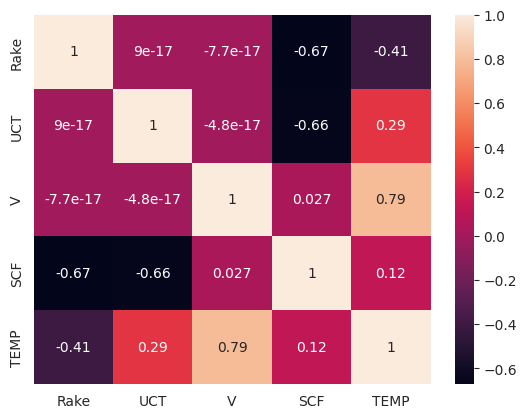

In [ ]:
# Correlation
correlations = df.corr()
sns.heatmap(correlations, annot=True)

The rake aangle and uncut chip thickness has a high negative correlation with the specific cutting force. Also, the cutting speed is highly correlated with max temperature. On the other hand, the cutting speed does not have a good correlation with the specific cutting force. The cutting force is also weakly correlated with the max temperature.

In [ ]:
# dividing the dataset to the input variables and output variables
x = df.iloc[:,0:-2]
y= df.iloc[:,-2:]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=190)

In [ ]:
# Normalization
sc = StandardScaler()
sc.fit(x_train)
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping

# ANN Architectures

Shallow and Narrow Network

In [ ]:
# model_1 - Shallow and narrow network
# model_2 - Shallow and wide network
# model_3 - Deep and wide network
# model_4 - Deep and narrow network

In [ ]:
model_1 = Sequential()
model_1.add(Dense(8, input_dim=3, activation = 'relu'))
model_1.add(Dense(8, activation = 'relu'))
model_1.add(Dense(2, activation='linear'))
model_1.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_1.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience = 10)
history1 = model_1.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping], verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 32        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


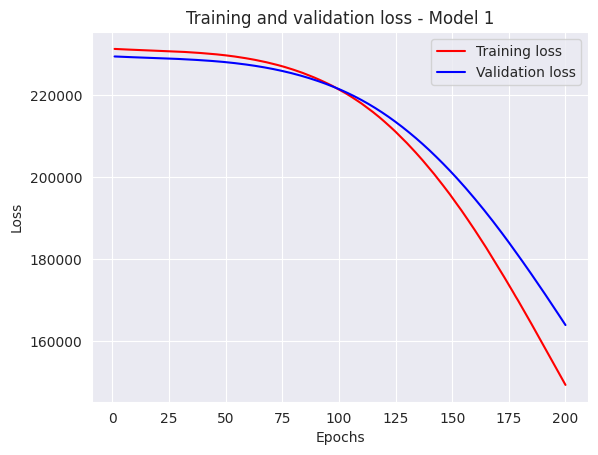

In [ ]:
loss= history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#sn = Shallow and Narrow
sn = model_1.predict(x_test_sc[:5])
print("Predicted values are: ", sn)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 189ms/step
Predicted values are:  [[171.8874   158.40688 ]
 [ 69.91803   65.69703 ]
 [122.65109  115.02885 ]
 [174.19427  159.63545 ]
 [139.10388  125.908646]]
Real values are:       SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


Shallow and wide

In [ ]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=3, activation = 'relu'))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(2, activation='linear'))
model_2.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_2.summary()
early_stopping2 = EarlyStopping(monitor='val_loss', patience = 10)
history2 = model_2.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping2], verbose=0)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 128)               512       
                                                                 
 dense_58 (Dense)            (None, 128)               16512     
                                                                 
 dense_59 (Dense)            (None, 2)                 258       
                                                                 
Total params: 17,282
Trainable params: 17,282
Non-trainable params: 0
_________________________________________________________________


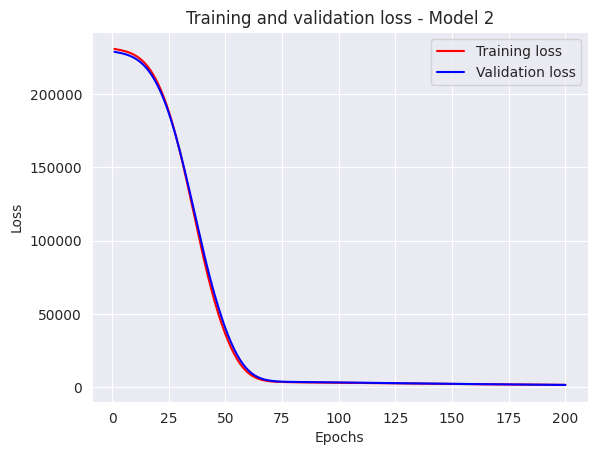

In [ ]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#sw = Shallow and Wide
sw = model_2.predict(x_test_sc[:5])
print("Predicted values are: ", sw)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 61ms/step
Predicted values are:  [[732.53754 239.45946]
 [721.7811  240.89111]
 [592.5178  226.83186]
 [733.08496 217.23605]
 [922.49    251.58864]]
Real values are:       SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


Deep and wide

In [ ]:
model_3 = Sequential()
model_3.add(Dense(128, input_dim=3, activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(48, activation='relu'))
model_3.add(Dense(48, activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(2, activation='linear'))

# compile model
model_3.compile(loss='mean_squared_error', optimizer='adam', metrics =['mae'])
model_3.summary()
early_stopping3 = EarlyStopping(monitor='val_loss', patience = 10)
history3 = model_3.fit(x_train_sc, y_train, validation_split=0.2, epochs=200, callbacks=[early_stopping3], verbose =0)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 128)               512       
                                                                 
 dense_61 (Dense)            (None, 128)               16512     
                                                                 
 dense_62 (Dense)            (None, 64)                8256      
                                                                 
 dense_63 (Dense)            (None, 48)                3120      
                                                                 
 dense_64 (Dense)            (None, 48)                2352      
                                                                 
 dense_65 (Dense)            (None, 32)                1568      
                                                                 
 dense_66 (Dense)            (None, 32)              

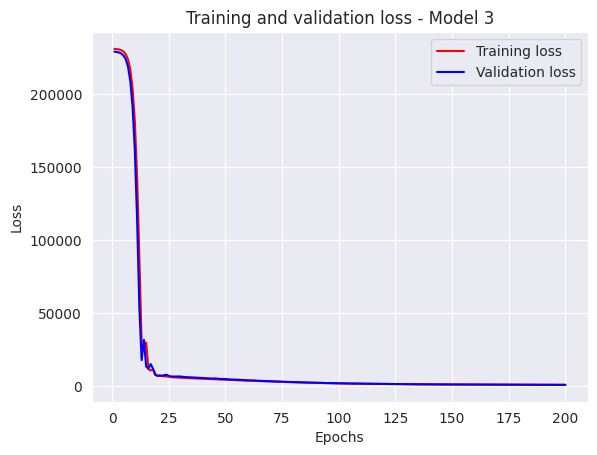

In [ ]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# dw = Deep and Wide
dw = model_3.predict(x_test_sc[:5])
print("Predicted values are: \n", dw)
print("Real values are: \n", y_test[:5])

1/1 [==============================] - 0s 118ms/step
Predicted values are: 
 [[725.489   228.64369]
 [699.55615 220.55634]
 [590.2868  186.29851]
 [754.53955 237.664  ]
 [869.67786 273.74057]]
Real values are: 
      SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


Deep and Narrow Network

In [ ]:
model_4 = Sequential()
model_4.add(Dense(8, input_dim=3, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(2, activation='linear'))

# compile model
model_4.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_4.summary()
early_stopping4 = EarlyStopping(monitor='val_loss', patience = 10)
history4 = model_4.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping4], verbose=0)


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 8)                 32        
                                                                 
 dense_69 (Dense)            (None, 8)                 72        
                                                                 
 dense_70 (Dense)            (None, 8)                 72        
                                                                 
 dense_71 (Dense)            (None, 8)                 72        
                                                                 
 dense_72 (Dense)            (None, 2)                 18        
                                                                 
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________


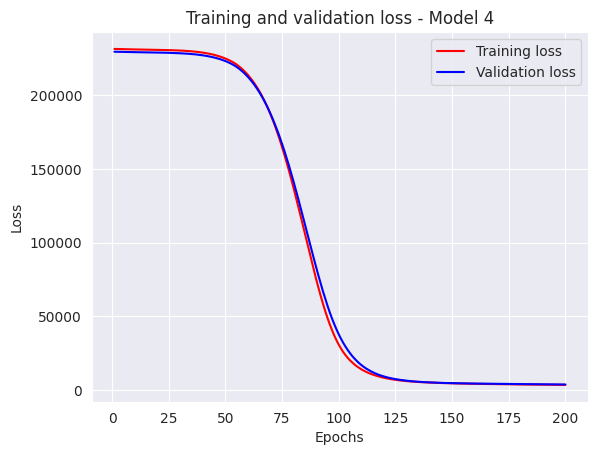

In [ ]:
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 4')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#dn = Deep and Narrow
dn = model_4.predict(x_test_sc[:5])
print("Predicted values are: \n", dn)
print("Real values are: \n", y_test[:5])

1/1 [==============================] - 0s 70ms/step
Predicted values are: 
 [[832.564   262.01346]
 [770.25854 242.21878]
 [569.4773  179.7923 ]
 [736.80835 232.2145 ]
 [937.5415  296.03757]]
Real values are: 
      SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


Finding the optimal ANN architecture

In [ ]:
mse1, mae1 = model_1.evaluate(x_test_sc, y_test)
mse2, mae2 = model_2.evaluate(x_test_sc, y_test)
mse3, mae3 = model_3.evaluate(x_test_sc, y_test)
mse4, mae4 = model_4.evaluate(x_test_sc, y_test) 
print(f"\nMean squared error and Mean absolute error from Model 1 is {mse1: .3f} and {mae1: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from Model 2 is {mse2: .3f} and {mae2: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from Model 3 is {mse3: .3f} and {mae3: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from Model 4 is {mse4: .3f} and {mae4: .3f} respectively")

2/2 [==============================] - 0s 10ms/step - loss: 3797.7336 - mae: 51.6580

Mean squared error and Mean absolute error from Model 1 is  262501.062 and  442.100 respectively

Mean squared error and Mean absolute error from Model 2 is  1743.234 and  32.898 respectively

Mean squared error and Mean absolute error from Model 3 is  1437.635 and  28.793 respectively

Mean squared error and Mean absolute error from Model 4 is  3797.734 and  51.658 respectively


Optimal ANN architecture is the Deep and Wide Network because it has the least mean absolute error.

# Changing the activation function

In [ ]:
model_1 = Sequential()
model_1.add(Dense(8, input_dim=3, activation = 'tanh'))
model_1.add(Dense(8, activation = 'tanh'))
model_1.add(Dense(2, activation='linear'))
model_1.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_1.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience = 10)
history1 = model_1.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping], verbose=0)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 8)                 32        
                                                                 
 dense_74 (Dense)            (None, 8)                 72        
                                                                 
 dense_75 (Dense)            (None, 2)                 18        
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


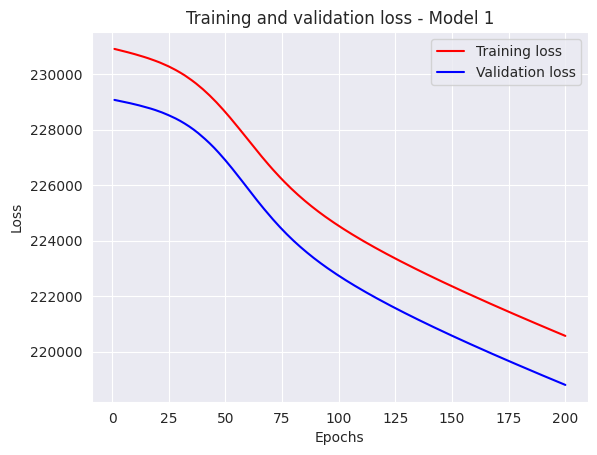

In [ ]:
loss= history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#sn = Shallow and Narrow
sn = model_1.predict(x_test_sc[:5])
print("Predicted values are: ", sn)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 68ms/step
Predicted values are:  [[13.200669  10.350833 ]
 [13.181661  10.335646 ]
 [13.186479  10.342096 ]
 [13.19726   10.347913 ]
 [13.177621  10.3315325]]
Real values are:       SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


In [ ]:
# MODEL 2
model_2 = Sequential()
model_2.add(Dense(128, input_dim=3, activation = 'tanh'))
model_2.add(Dense(128, activation='tanh'))
model_2.add(Dense(2, activation='linear'))
model_2.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_2.summary()
early_stopping2 = EarlyStopping(monitor='val_loss', patience = 10)
history2 = model_2.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping2], verbose=0)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 128)               512       
                                                                 
 dense_77 (Dense)            (None, 128)               16512     
                                                                 
 dense_78 (Dense)            (None, 2)                 258       
                                                                 
Total params: 17,282
Trainable params: 17,282
Non-trainable params: 0
_________________________________________________________________


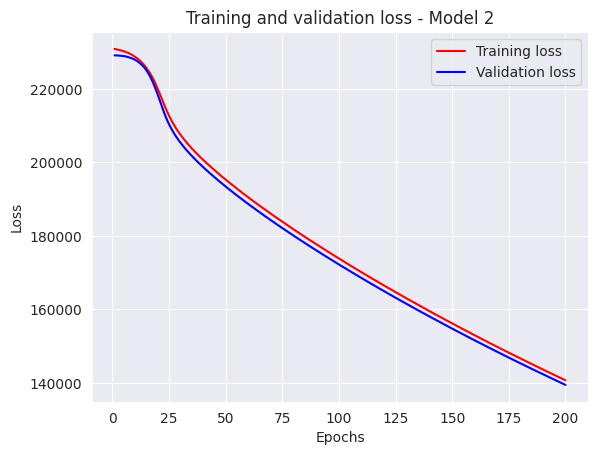

In [ ]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#sw = Shallow and Wide
sw = model_2.predict(x_test_sc[:5])
print("Predicted values are: ", sw)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 61ms/step
Predicted values are:  [[129.07494  107.26043 ]
 [129.06596  107.25289 ]
 [129.06898  107.255936]
 [129.07607  107.26119 ]
 [129.06764  107.25361 ]]
Real values are:       SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


In [ ]:
# MODEL 3
model_3 = Sequential()
model_3.add(Dense(128, input_dim=3, activation='tanh'))
model_3.add(Dense(128, activation='tanh'))
model_3.add(Dense(64, activation='tanh'))
model_3.add(Dense(48, activation='tanh'))
model_3.add(Dense(48, activation='tanh'))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dense(2, activation='linear'))

# compile model
model_3.compile(loss='mean_squared_error', optimizer='adam', metrics =['mae'])
model_3.summary()
early_stopping3 = EarlyStopping(monitor='val_loss', patience = 10)
history3 = model_3.fit(x_train_sc, y_train, validation_split=0.2, epochs=200, callbacks=[early_stopping3], verbose =0)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 128)               512       
                                                                 
 dense_80 (Dense)            (None, 128)               16512     
                                                                 
 dense_81 (Dense)            (None, 64)                8256      
                                                                 
 dense_82 (Dense)            (None, 48)                3120      
                                                                 
 dense_83 (Dense)            (None, 48)                2352      
                                                                 
 dense_84 (Dense)            (None, 32)                1568      
                                                                 
 dense_85 (Dense)            (None, 32)              

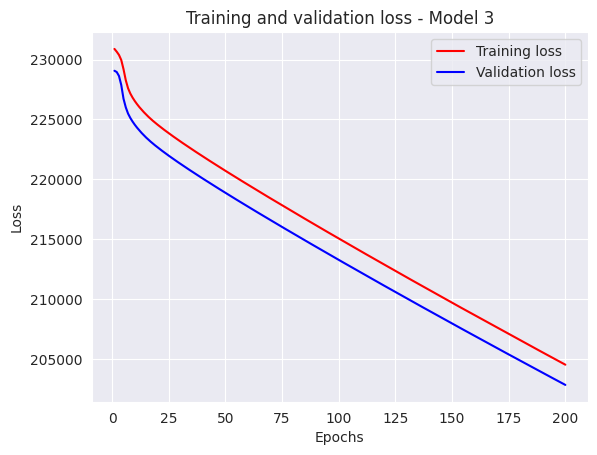

In [ ]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# dw = Deep and Wide
dw = model_3.predict(x_test_sc[:5])
print("Predicted values are: \n", dw)
print("Real values are: \n", y_test[:5])

1/1 [==============================] - 0s 22ms/step
Predicted values are: 
 [[34.031773 27.89323 ]
 [34.031765 27.893227]
 [34.031765 27.893225]
 [34.031773 27.89323 ]
 [34.031765 27.893227]]
Real values are: 
      SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


In [ ]:
model_4 = Sequential()
model_4.add(Dense(8, input_dim=3, activation='tanh'))
model_4.add(Dense(8, activation='tanh'))
model_4.add(Dense(8, activation='tanh'))
model_4.add(Dense(8, activation='tanh'))
model_4.add(Dense(2, activation='linear'))

# compile model
model_4.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_4.summary()
early_stopping4 = EarlyStopping(monitor='val_loss', patience = 10)
history4 = model_4.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping4], verbose=0)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 8)                 32        
                                                                 
 dense_98 (Dense)            (None, 8)                 72        
                                                                 
 dense_99 (Dense)            (None, 8)                 72        
                                                                 
 dense_100 (Dense)           (None, 8)                 72        
                                                                 
 dense_101 (Dense)           (None, 2)                 18        
                                                                 
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________


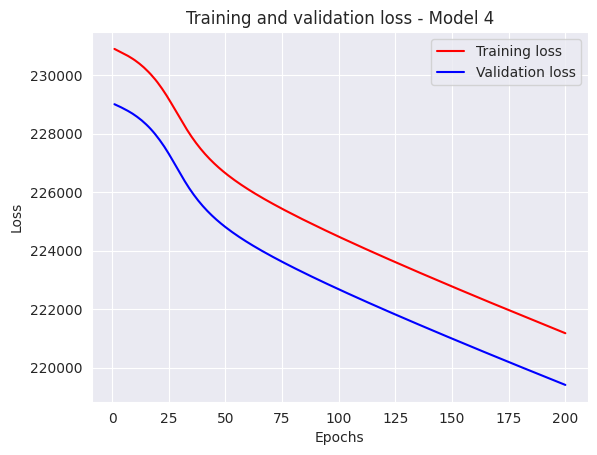

In [ ]:
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 4')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#dn = Deep and Narrow
dn = model_4.predict(x_test_sc[:5])
print("Predicted values are: \n", dn)
print("Real values are: \n", y_test[:5])

1/1 [==============================] - 0s 78ms/step
Predicted values are: 
 [[12.267143 10.149879]
 [12.266619 10.149433]
 [12.264698 10.147312]
 [12.269131 10.151506]
 [12.269094 10.151623]]
Real values are: 
      SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


In [ ]:
# Optimal Architecture using Hyperbolic Tangent Activation Function
mse1, mae1 = model_1.evaluate(x_test_sc, y_test)
mse2, mae2 = model_2.evaluate(x_test_sc, y_test)
mse3, mae3 = model_3.evaluate(x_test_sc, y_test)
mse4, mae4 = model_4.evaluate(x_test_sc, y_test) 
print(f"\nMean squared error and Mean absolute error from ANN1 is {mse1: .3f} and {mae1: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from ANN2 is {mse2: .3f} and {mae2: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from ANN3 is {mse3: .3f} and {mae3: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from ANN4 is {mse4: .3f} and {mae4: .3f} respectively")

2/2 [==============================] - 0s 7ms/step - loss: 263311.2500 - mae: 443.3036

Mean squared error and Mean absolute error from ANN1 is  262644.188 and  442.752 respectively

Mean squared error and Mean absolute error from ANN2 is  175220.391 and  336.350 respectively

Mean squared error and Mean absolute error from ANN3 is  245211.875 and  423.550 respectively

Mean squared error and Mean absolute error from ANN4 is  263311.250 and  443.304 respectively


The optimal ANN architecture when activation function changed and the optimal architecture was the Shallow and Wide Network. In addition, the hyperbolic tangent activation function was not ideal in predicting the ouptut and contains large values of mean absolute errors.